In [45]:
import pandas as pd
import numpy as np

In [46]:
df=pd.read_csv("employees.csv")

## EDA

In [47]:
df.head()

,First Name,Gender,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,97308,6.945,TRUE,Marketing
1,Thomas,Male,61933,NaN,TRUE,NaN
2,Maria,Female,130590,11.858,FALSE,Finance
3,Jerry,Male,NaN,9.34,TRUE,Finance
4,Larry,Male,101004,1.389,TRUE,Client Services


In [48]:
df.shape

(1000, 6)

In [49]:
#My datatype is malformed because i have some str in the number colums
#Also there are multiple missing values in all column
# For exam gender column 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   First Name         931 non-null    object
 1   Gender             852 non-null    object
 2   Salary             998 non-null    object
 3   Bonus %            997 non-null    object
 4   Senior Management  932 non-null    object
 5   Team               957 non-null    object
dtypes: object(6)
memory usage: 47.0+ KB


In [54]:
df.dtypes

First Name           object
Gender               object
Salary               object
Bonus %              object
Senior Management    object
Team                 object
dtype: object

In [10]:
df["Gender"].head(10)

0      Male
1      Male
2    Female
3      Male
4      Male
5      n.a.
6    Female
7    Female
8       NaN
9    Female
Name: Gender, dtype: object

## Getting all the unique values in each column

In [11]:
#this helps me to get all the unique values in my gender column
df["Gender"].unique()

array(['Male', 'Female', 'n.a.', nan], dtype=object)

In [12]:

df["Senior Management"].unique()

array(['TRUE', 'FALSE', nan, 'n.a.', '?'], dtype=object)

In [17]:
df["Salary"].unique()

array([ 97308.,  61933., 130590.,     nan, 101004., 115163.,  65476.,
        45906., 139852.,  63241., 102508., 112807., 109831.,  41426.,
        59414.,  90370., 111737., 132940.,  81014.,  64714., 100612.,
        90816., 125792.,  97950.,  37076.,  37598., 122367., 124008.,
        79529., 118780.,  88657., 122340., 119082.,  95734.,  85182.,
       142032.,  57427.,  36844., 122173.,  99283.,  66582., 121918.,
        73524., 145146.,  88010., 114796.,  66820.,  93581., 113590.,
        94976.,  41126.,  49339.,  40341.,  83677., 102488., 130276.,
        64715.,  72670.,  66851.,  48866., 106862.,  58112.,  35203.,
        77834.,  61310., 125250.,  51178.,  84834., 100863.,  84692.,
       118172.,  54043.,  90582.,  62096., 104897., 131604., 107391.,
       114797., 115814., 137126.,  47369.,  35095., 148115.,  83072.,
       100238., 103495., 144887.,  64088.,  51082.,  91719., 128771.,
       119009., 111858., 130620.,  43026., 142321., 140371., 100705.,
        77544.,  481

## make a list of unique values and do this;

In [13]:
# We are creating a list of all the unque values and assigning them to miss_val_format
miss_val_format=["NA", "?", "n.a.", "n/a", "na","--"]

In [14]:
#Here we are rereading the data and telling pandas to replace all "miss_val_format" entries will null_value NAN
df=pd.read_csv("employees.csv", na_values = miss_val_format)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   First Name         930 non-null    object 
 1   Gender             851 non-null    object 
 2   Salary             995 non-null    float64
 3   Bonus %            996 non-null    float64
 4   Senior Management  929 non-null    object 
 5   Team               952 non-null    object 
dtypes: float64(2), object(4)
memory usage: 47.0+ KB


In [19]:
#Getting all the missing value from df
df.isnull().sum()

First Name            70
Gender               149
Salary                 5
Bonus %                4
Senior Management     71
Team                  48
dtype: int64

## Dropping rows with missing value 

In [20]:
#axis 0= row, axis 1 = column
new_df= df.dropna(axis=0)

In [22]:
new_df.isnull().sum()

First Name           0
Gender               0
Salary               0
Bonus %              0
Senior Management    0
Team                 0
dtype: int64

In [24]:
#Not good alot of data are gone
new_df.shape

(742, 6)

In [25]:
new_df= df.dropna(axis=1)

In [26]:
new_df.shape

(1000, 0)

In [28]:
df["Salary"].fillna(0)

0       97308.0
1       61933.0
2      130590.0
3           0.0
4      101004.0
         ...   
995    132483.0
996     42392.0
997     96914.0
998     60500.0
999    129949.0
Name: Salary, Length: 1000, dtype: float64

In [30]:
# Display all missing rows
df.isnull().sum()

First Name            70
Gender               149
Salary                 5
Bonus %                4
Senior Management     71
Team                  48
dtype: int64

In [43]:
df.describe()

,Salary,Bonus %
count,995.000000,996.000000
mean,90522.329648,10.215586
std,32880.654889,5.532077
min,35013.000000,1.015000
25%,62412.500000,5.429500
50%,90370.000000,9.850000
75%,118582.000000,14.841250
max,149908.000000,19.944000


In [ ]:
#df["Salary"].fillna(0, inplace=True)
#this code changes the dataset, this will now clean all missing values in the salary

In [31]:
# Replace all unknown data with unknown
df["Gender"].fillna("unknown")

0         Male
1         Male
2       Female
3         Male
4         Male
        ...   
995    unknown
996       Male
997       Male
998       Male
999       Male
Name: Gender, Length: 1000, dtype: object

## Another way of dealing with missing if the values are close to each other


In [36]:
# Repalcing the missing data with the entry behind it, or "ffill" before it
#This is useful if the data are close to each other.
df["Salary"].fillna(method="bfill")

0       97308.0
1       61933.0
2      130590.0
3      101004.0
4      101004.0
         ...   
995    132483.0
996     42392.0
997     96914.0
998     60500.0
999    129949.0
Name: Salary, Length: 1000, dtype: float64

In [33]:
import seaborn as sns

<Axes: xlabel='Salary', ylabel='Count'>

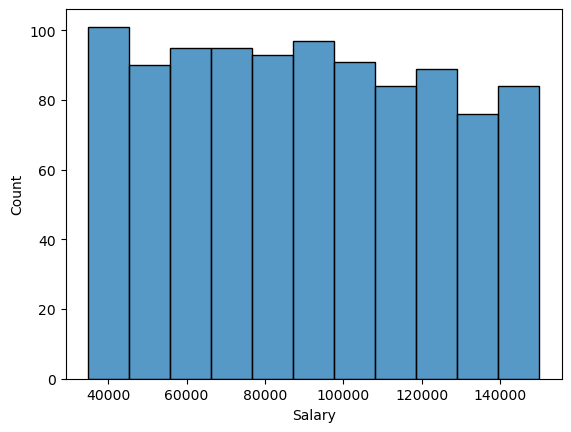

In [34]:
#Checking distribution of the salary variable
#This distribution follow thesame patter so replacing it with mean, median and mode is justified 
sns.histplot(data=df, x="Salary")

In [39]:
# Replacing missing value with mean of the column
df["Salary"].fillna(df["Salary"].mean())

0       97308.000000
1       61933.000000
2      130590.000000
3       90522.329648
4      101004.000000
           ...      
995    132483.000000
996     42392.000000
997     96914.000000
998     60500.000000
999    129949.000000
Name: Salary, Length: 1000, dtype: float64

<Axes: xlabel='Salary', ylabel='Count'>

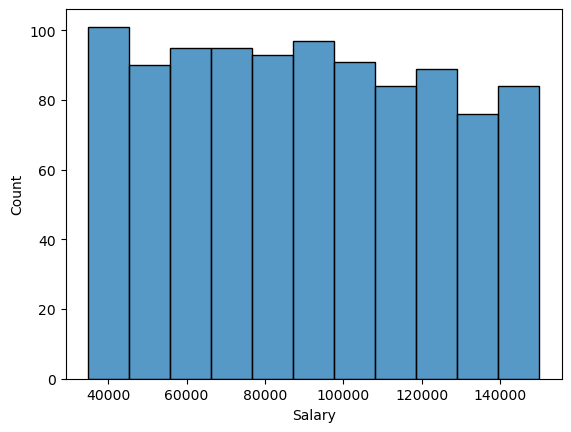

In [40]:
#We can see data still matain its distribution 
sns.histplot(data=df, x="Salary")

In [41]:
# Another method of dealing with null values 
df["Salary"].interpolate(method="linear", direction= "forward")

0       97308.0
1       61933.0
2      130590.0
3      115797.0
4      101004.0
         ...   
995    132483.0
996     42392.0
997     96914.0
998     60500.0
999    129949.0
Name: Salary, Length: 1000, dtype: float64